# Random forest

Notebook to look at forecasts made using random forest.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

In [2]:
from random_forest import backtest

In [3]:
ds_begin = datetime(2021, 7, 1)
ds_end = datetime(2023, 5, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

## Predictions when removing the seasonality

In [4]:
error = pd.read_csv('random_forest/errors_sa.csv')
print(error)

    Unnamed: 0  n_estimators  max_samples       MSE      RMSE       MAE  \
0            0            10          0.5  0.000026  0.005124  0.004260   
1            0            10          0.6  0.000024  0.004889  0.003883   
2            0            10          0.7  0.000020  0.004454  0.003662   
3            0            10          0.8  0.000022  0.004653  0.003778   
4            0            10          0.9  0.000027  0.005160  0.004460   
5            0            20          0.5  0.000023  0.004833  0.004218   
6            0            20          0.6  0.000022  0.004685  0.003944   
7            0            20          0.7  0.000021  0.004577  0.003832   
8            0            20          0.8  0.000021  0.004562  0.003816   
9            0            20          0.9  0.000023  0.004751  0.004077   
10           0            50          0.5  0.000024  0.004851  0.004157   
11           0            50          0.6  0.000021  0.004594  0.003902   
12           0           

We get the best results for n_estimator = 10 and max_sample = 0.7. Let us plot the predictions.

In [5]:
features_sa = [('sales_raw', 1),
               ('inventory_raw', 1),
               ('new_listings_raw', 1),
               ('mean_days_to_pending_raw', 1),
               ('mean_sale_to_list_ratio_raw', 2),
               ('median_days_to_pending_raw', 1),
               ('median_sale_to_list_ratio_raw', 2),
               ('newly_pending_listings_raw', 1),
               ('pct_listings_price_cut_raw', 1),
               ('pct_sold_above_list_price_raw', 2),
               ('pct_sold_below_list_price_raw', 2)]

In [6]:
(y, y_hat) = backtest(features_sa, 10, 0.7, ds_begin, ds_end, 36, True)

In [7]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


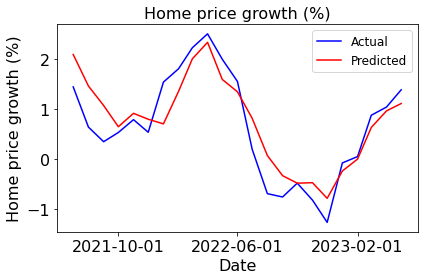

In [8]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2021, 10, 1), datetime(2022, 6, 1), datetime(2023, 2, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/random_forest.eps', format='eps')
plt.show()

## Predictions when keeping the seasonality

In [9]:
error = pd.read_csv('random_forest/errors_nsa.csv')
print(error)

    Unnamed: 0  n_estimators  max_samples       MSE      RMSE       MAE  \
0            0            10          0.5  0.000045  0.006733  0.005851   
1            0            10          0.6  0.000043  0.006538  0.005638   
2            0            10          0.7  0.000045  0.006727  0.005733   
3            0            10          0.8  0.000043  0.006532  0.005663   
4            0            10          0.9  0.000043  0.006566  0.005533   
5            0            20          0.5  0.000045  0.006679  0.005771   
6            0            20          0.6  0.000045  0.006706  0.005812   
7            0            20          0.7  0.000047  0.006892  0.005829   
8            0            20          0.8  0.000047  0.006835  0.005924   
9            0            20          0.9  0.000045  0.006690  0.005763   
10           0            50          0.5  0.000046  0.006777  0.005859   
11           0            50          0.6  0.000049  0.006971  0.006139   
12           0           

We get the best results for n_estimator = 10 and max_sample = 0.8. Let us plot the predictions.

In [10]:
features_nsa = [('sales_raw', 1),
                ('inventory_raw', 2),
                ('new_listings_raw', 5),
                ('mean_days_to_pending_raw', 1),
                ('mean_sale_to_list_ratio_raw', 2),
                ('median_days_to_pending_raw', 1),
                ('median_sale_to_list_ratio_raw', 2),
                ('newly_pending_listings_raw', 1),
                ('pct_listings_price_cut_raw', 2),
                ('pct_sold_above_list_price_raw', 2),
                ('pct_sold_below_list_price_raw', 2)]

In [11]:
(y, y_hat) = backtest(features_nsa, 10, 0.8, ds_begin, ds_end, 36, False)

In [12]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

Text(0.5, 1.0, 'Non seasonally adjusted ensemble model')

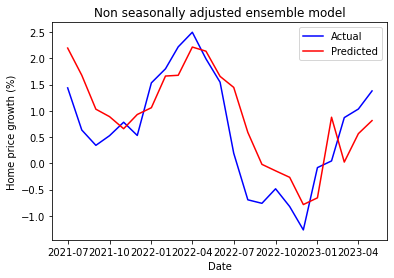

In [13]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted ensemble model')